## Анализ гипотезы о времени активности пользователей в Москве и Санкт-Петербурге в Яндекс Книге.

- Автор: Валеева Евгения Маратовна
- Дата: 11.02.2026

## Цели и задачи проекта

<font color='#777778'>В данном исследовании используется набор данных yandex_knigi_data.csv, который содержит информацию о  пользователях из Москвы и Санкт-Петербурга c суммой часов их активности за период с 1 сентября по 11 декабря 2024 года.\
Цели проекта: провести статистический анализ односторонней гипотезы с двумя выборками и принять статистически обоснованное решение о том, проводят ли пользователи из Санкт-Петербурга больше времени за чтением и прослушиванием книг в приложении Яндекс Книги, чем пользователи из Москвы.\
Задачи проекта:
- Загрузить данные и познакомиться с ними: изучить их объем, оценить содержимое, проанализировать типы данных.
- Проверить наличие дубликатов в идентификаторах пользователей. 
- Сравнить размеры групп, их статистики и распределение.
- Провести статистический анализ односторонней гипотезы с двумя выборками.
- По результатам проведенного исследовательского анализа написать аналитическую записку.</font>

## Описание данных

<font color='#777778'>В проекте будут использованы данные датасета yandex_knigi_data.csv, который содержит информацию о пользователях из Москвы и Санкт-Петербурга c суммой часов их активности за период с 1 сентября по 11 декабря 2024 года.
 - city — город пользователя
 - puid — идентификатор пользователя
 - hours — общее количество часов активности</font>

## Содержимое проекта

<font color='#777778'>1. Загрузка данных и знакомство с ними.\
2. Проверка гипотезы в Python.\
3. Аналитическая записка.
</font>

---

## 1. Загрузка данных и знакомство с ними

Загрузим данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns 

# Убираем предупреждения
import warnings
warnings.filterwarnings("ignore")

# Выгружаем данные в переменную df с обработкой ошибок
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/yandex_knigi_data.csv')
except Exception as e:
    print(f"Произошла ошибка: {type(e).__name__}: {e}")
    df = None

In [2]:
# Выводим первые 5 строк нашего датафрейма
df.head(5)

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


In [3]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


На данный момент датасет `/datasets/yandex_knigi_data.csv` содержит 4 столбца и 8784 строки.
- Столбец` Unnamed: 0` является техническим и будет удален — это сохраненный индекс из исходного файла, не несущий смысловой нагрузки.
- Столбцы `puid` и` hours` будут переименованы для удобства на `user_id` (идентификатор пользователя) и `total_hours`(общее количество часов активности).
- Пропусков в столбцах нет.
- Типы данных соответствуют значениям в столбцах.\
После предобработки датасет будет содержать 3 столбца `(city, user_id, total_hours)` и 8784 строки.

In [4]:
# Удаляем ненужный столбец 
df = df.drop(columns=['Unnamed: 0'])

# Переименовываем столбцы
df = df.rename(columns={'puid': 'user_id', 'hours': 'total_hours'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         8784 non-null   object 
 1   user_id      8784 non-null   int64  
 2   total_hours  8784 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.0+ KB


Все преобразования прошли успешно.
- Столбец Unnamed: 0 удален, столбцы переименованы.

In [6]:
# Проверим наличие дубликатов в идентификаторах пользователей
df.duplicated(subset=['user_id']).sum()

244

In [7]:
total = df.shape[0]
unique = df['user_id'].nunique()
duplicates = df.duplicated(subset=['user_id']).sum()
duplicates_perc = (duplicates / total) * 100 
print(f'Всего строк {total}')
print(f'Количество уникальных пользователей {unique}')
print(f'Количество дублирующих записей {duplicates}')
print(f'Доля дублирующихся записей: {duplicates_perc:.2f}%')

Всего строк 8784
Количество уникальных пользователей 8540
Количество дублирующих записей 244
Доля дублирующихся записей: 2.78%


In [8]:
# Удалим дубликаты (оставляем первое вхождение)
df = df.drop_duplicates(subset=['user_id'], keep='first')

# Проверим результат
df.duplicated(subset=['user_id']).sum()

0

In [9]:
# Посчитаем количество строк после удаления дубликатов
after = df.shape[0]
removed = total - after
removed_pers = (removed / total) * 100
print(f'Количество строк после удаления дубликатов {after}')
print(f'Количество удаленных строк {removed}')
print(f'Доля удаленных сток {removed_pers:.2f}%')

Количество строк после удаления дубликатов 8540
Количество удаленных строк 244
Доля удаленных сток 2.78%


Дубликаты успешно удалены, у нас остались строки с уникальными пользователями. Каждому пользователю соответствует одна запись.

In [10]:
# Рассчитаем количество уникальных пользователей в каждом городе
df[df['city'] == 'Санкт-Петербург']['user_id'].nunique(), df[df['city'] == 'Москва']['user_id'].nunique() 

(2306, 6234)

Количество пользователей из Москвы сильно превышает количество пользователей из Санкт-Петербурга более чем в два раза.
Проверим, не попали ли пользователи в две группы одновременно.

In [11]:
users_a = df[df['city'] == 'Москва']['user_id']
users_b = df[df['city'] == 'Санкт-Петербург']['user_id']

intersection = list(set(users_a) & set(users_b))
print(intersection)

[]


Результат [ ] означает, что пересечений пользователей в группах нет.

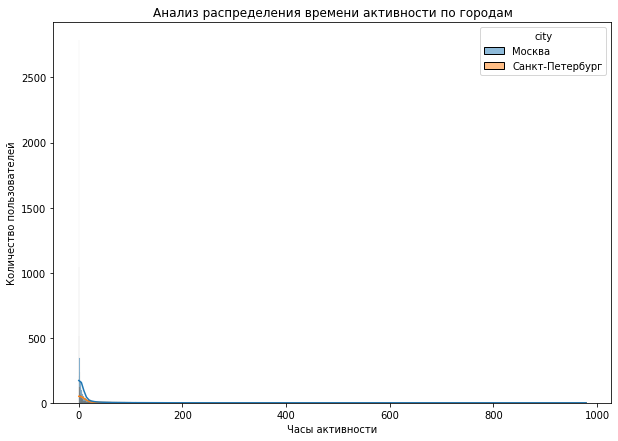

In [12]:
# Посмотрим распределение данных
moscow = df[df['city'] == 'Москва']['total_hours']
spb = df[df['city'] == 'Санкт-Петербург']['total_hours']

fig = plt.figure(figsize=(10, 7))
sns.histplot(data=df, x='total_hours', hue='city', kde=True)
plt.title('Анализ распределения времени активности по городам')
plt.xlabel('Часы активности')
plt.ylabel('Количество пользователей')
plt.show()

Видим выбросы 800+ часов актиновсти, посмотрим на гистограмму без выбросов.

Данные без выбросов: 8454 записей
Количество уникальных пользователей без выбросов в Санкт-Петербурге: 2284
Количество уникальных пользователей без выбросов в Москве: 6170


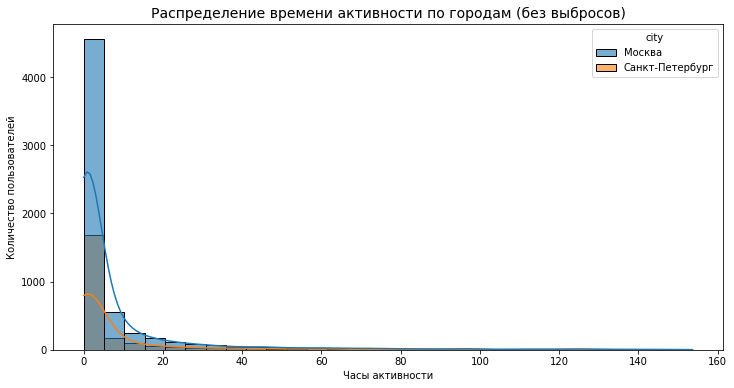

In [13]:
# Удалим выбросы по 99 перцентилю
percentile_99 = df['total_hours'].quantile(0.99)
df_clean = df[df['total_hours'] <= percentile_99]
# Рассчитаем количество уникальных пользователей в каждом городе без выбросов
spb_users = df_clean[df_clean['city'] == 'Санкт-Петербург']['user_id'].nunique()
msk_users = df_clean[df_clean['city'] == 'Москва']['user_id'].nunique()
print(f"Данные без выбросов: {len(df_clean)} записей")
print(f"Количество уникальных пользователей без выбросов в Санкт-Петербурге: {spb_users}")
print(f"Количество уникальных пользователей без выбросов в Москве: {msk_users}")

# Строим гистограмму
plt.figure(figsize=(12, 6))
sns.histplot(data=df_clean, x='total_hours', hue='city', 
             kde=True, alpha=0.6, bins=30)
plt.title('Распределение времени активности по городам (без выбросов)', fontsize=14)
plt.xlabel('Часы активности')
plt.ylabel('Количество пользователей')
plt.show()

`По гистограмме распределения без выбросов мы можем сделать следующие выводы:`
- распределение обоих городов имеет схожую форму со смещение вправо.
- пик активности приходится на 0-20 часов для обоих городов
- Москва доминирует по количеству пользователей (6170 и 2284), что соответствует размеру групп
- после удаления верхних выбросов по 99 перцентилю максимальное значение не превышают примерно 140-160 часов.

In [14]:
# Посмотрим средние значения и медиану по часам активности в городах
stats = df_clean.groupby('city')['total_hours'].agg(['mean', 'median'])
stats

,mean,median
city,,
Москва,8.083464,0.888748
Санкт-Петербург,8.377901,0.852310


`Анализ средних и медиан времени активности показал:`
- в обоих городах наблюдается правосторонняя асимметрия распределения: это указывает на наличие "супер-читателей" с высокими значениями, которые смещают среднее вверх относительно типичного пользователя.\
`Сравнение городов:`
- по среднему значению: СПб опережает Москву на 0.29 ч (≈17 минут)
- по медиане: Москва опережает СПб на 0.04 ч (≈2 минуты)\
Различие в медианах крайне мало и не имеет практической значимости.\
`Обоснование выбора t-теста:`
- объем выборок очень большой и разброс значений сильно отличается (6170 и 2284)
- пользователи в городах не пересекаются между собой   
- центральная предельная теорема обеспечивает нормальность 

Таким образом, для проверки гипотезы о том, что среднее время активности в Санкт-Петербурге больше, чем в Москве, 
корректно использовать односторонний t-тест Уэлча 
(с поправкой на неравные дисперсии).

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуем статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [15]:
moscow = df_clean[df_clean['city'] == 'Москва']['total_hours']
spb = df_clean[df_clean['city'] == 'Санкт-Петербург']['total_hours']

alpha = 0.05

stat_welch_ttest, p_value_welch_ttest = ttest_ind(
    spb, 
    moscow, 
    equal_var=False,
    alternative='greater'
)

if p_value_welch_ttest < alpha:
    print(f'p-value теста Уэлча ={round(p_value_welch_ttest, 2)}')
    print('Нулевая гипотеза не находит подтверждения! Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо')
else:
    print(f'p-value теста Уэлча ={round(p_value_welch_ttest, 2)}')
    print('Нулевая гипотеза находит подтверждение! Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается')


p-value теста Уэлча =0.27
Нулевая гипотеза находит подтверждение! Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается


Найдем пользователей, которые практически не читают. Отфильтруем пользователей, у которых активность в приложении была от `0 до 10 минут`. Это может означать, что они установили приложение, но не используют его, либо используют крайне редко и не являются активной аудиторией и и могут влиять на результаты статистического теста.

In [16]:
# Пользователи с активностью от 0 до 10 минут (0.167 часа)
low_users = df_clean[df_clean['total_hours'] <= 0.167]

low_users_count = low_users['user_id'].nunique()
low_users_moscow = low_users[low_users['city'] == 'Москва']['user_id'].nunique()
low_users_spb = low_users[low_users['city'] == 'Санкт-Петербург']['user_id'].nunique()

print(f'Количество пользователей, у которых активность в приложении 0-10 мин: {low_users_count}')
print(f'Москва: {low_users_moscow}')
print(f'СПб: {low_users_spb}')

Количество пользователей, у которых активность в приложении 0-10 мин: 2758
Москва: 2014
СПб: 744


In [17]:
# Посчитаем доли пользователей с активностью 0-10 минут
total_users_clean = df_clean['user_id'].nunique()
total_moscow_clean = df_clean[df_clean['city'] == 'Москва']['user_id'].nunique()
total_spb_clean = df_clean[df_clean['city'] == 'Санкт-Петербург']['user_id'].nunique()

# Считаем доли от df_clean
low_users_pct = (low_users_count / total_users_clean) * 100
low_moscow_pct = (low_users_moscow / total_moscow_clean) * 100
low_spb_pct = (low_users_spb / total_spb_clean) * 100

print(f'Доля пользователей с активностью 0-10 мин: {low_users_pct:.2f}%')
print(f'Доля в Москве: {low_moscow_pct:.2f}%')
print(f'Доля в СПб: {low_spb_pct:.2f}%')

Доля пользователей с активностью 0-10 мин: 32.62%
Доля в Москве: 32.64%
Доля в СПб: 32.57%


Интересно, что доля практически неактивных пользователей за период `с 1 сентября по 11 декабря 2024 года` оказалась одинаковой в обоих городах — 32.6%. Это говорит о том, что данные распределены равномерно, и сравнение активных пользователей будет корректным.\
Проведем статистический тест заново с активными пользователями.

In [18]:
# Удалим пользователей с активностью 0-10 минут
df_active = df_clean[df_clean['total_hours'] > 0.167]

# t-тест Уэлча
moscow_active = df_active[df_active['city'] == 'Москва']['total_hours']
spb_active = df_active[df_active['city'] == 'Санкт-Петербург']['total_hours']

alpha = 0.05

stat_welch_ttest, p_value_welch_ttest = ttest_ind(
    spb_active, 
    moscow_active, 
    equal_var=False,
    alternative='greater'
)

if p_value_welch_ttest < alpha:
    print(f'p-value теста Уэлча ={round(p_value_welch_ttest, 2)}')
    print('Нулевая гипотеза не находит подтверждения! Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо')
else:
    print(f'p-value теста Уэлча ={round(p_value_welch_ttest, 2)}')
    print('Нулевая гипотеза находит подтверждение! Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается')


p-value теста Уэлча =0.27
Нулевая гипотеза находит подтверждение! Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается


## 3. Аналитическая записка
По результатам анализа данных подготовьте аналитическую записку, в которой опишете:

- Выбранный тип t-теста и уровень статистической значимости.

- Результат теста, или p-value.

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

- Одну или две возможные причины, объясняющие полученные результаты.



`Тип теста:` Односторонний t-тест Уэлча для двух независимых выборок.\
`Обоснование выбора:`
- объем выборок очень большой и разброс значений сильно отличается - в Москве 6170 уникальных пользователей и в Санкт-Петербурге - 2284 пользователя.
- пользователи в городах не пересекаются между собой
- центральная предельная теорема обеспечивает нормальность выборочного среднего

`Уровень статистической значимости: α = 0.05`.

`Нулевая гипотеза  𝐻0:𝜇СПб≤𝜇Москва`
 - Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.
 
`Альтернативная гипотеза  𝐻1:𝜇СПб>𝜇Москва`
 - Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

`Была проведена следующая обработка данных:`
- Удалены дублирующиеся записи по идентификаторам пользователей
- Сравнены размеры групп, их статистики и распределение.
- Удалены выбросы по 99-му перцентилю
- Исключены неактивные пользователи (активность 0-10 минут за период)

`Результаты статистического теста`:p-value = 0.27. Сравнение с уровнем значимости: 0.27 > 0.05. Полученное значение p-value (0.27) превышает установленный уровень статистической значимости (α = 0.05). Альтернативная гипотеза не находит подтверждение.\
Мы удалили неактивных пользователей, но p-value остался на том же уровне (0.27). Это значит, что неактивные пользователи не маскировали различия между группами и проблема не в качестве данных, а в отсутствии реального эффекта.Таким образом, у нас нет достаточных статистических оснований утверждать, что пользователи из Санкт-Петербурга проводят в приложении Яндекс Книги больше времени, чем пользователи из Москвы.

`Возможные причины полученных результатов:`
- мы не нашли различий, потому что их нет.
- при таком большом объеме выборки мощность теста недостаточна, чтобы обнаружить столь незначительное различие как статистически значимое.

`Рекомендации для дальнейшего анализа:`
- исследовать другие метрики активности:  
  — частота заходов;  
  — длительность сессий;  
  — количество прочитанных книг;  
  — Retention (процент пользователей, которые возвращаются в приложение через день, неделю, месяц);
- провести маркетинговые активности для повышения частоты заходов, привлечения новой аудитории.
- провести дополнительный сбор данных для увеличения мощности теста.
